# Regression

### Objective
1. Predict the Airbnb listing price with the available information of the individual listings in Seattle.
2. Explore the important factors that affect the prices of Airbnb listings in Seattle.

Blog: https://towardsdatascience.com/solving-regression-problems-by-combining-statistical-learning-with-machine-learning-82949f7ac18a

Dataset: https://www.kaggle.com/airbnb/seattle

In [2]:
import pandas as pd

In [3]:
# Importing dataset 
folderpath = "D:\\Personal\\Study\\Bits Pilani\\Git\python-basic-1\\Regression\\airbnb-seattle"
calendar = pd.read_csv(folderpath + "\\calendar.csv")
listings = pd.read_csv(folderpath + "\\listings.csv")
reviews = pd.read_csv(folderpath + "\\reviews.csv")

In [4]:
# Row*Col count
print("Calendar shape: {0} \nListings shape: {1} \nReviews shape: {2}".format(calendar.shape, listings.shape, reviews.shape))

Calendar shape: (1393570, 4) 
Listings shape: (3818, 92) 
Reviews shape: (84849, 6)


In [5]:
# Columns
print("Calendar columns: {0} \nListings columns: {1} \nReviews columns: {2}".format(calendar.columns, listings.columns, reviews.columns))

Calendar columns: Index(['listing_id', 'date', 'available', 'price'], dtype='object') 
Listings columns: Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'proper

In [6]:
# Clearing memory by flusing calendar and review data as it won't be used
del(calendar)
del(reviews)

### Analysing data and columns 

In [7]:
# Split Listings by data types and check them in chunks
listings.dtypes.value_counts()

object     62
float64    17
int64      13
dtype: int64

In [8]:
listings.columns[listings.dtypes == object]

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_s

In [9]:
listings.columns[listings.dtypes != object]

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

In [10]:
listings[["host_response_rate","host_acceptance_rate","weekly_price", "monthly_price","security_deposit","cleaning_fee","extra_people"]].head()

,host_response_rate,host_acceptance_rate,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
0,96%,100%,NaN,NaN,NaN,NaN,$5.00
1,98%,100%,"$1,000.00","$3,000.00",$100.00,$40.00,$0.00
2,67%,100%,NaN,NaN,"$1,000.00",$300.00,$25.00
3,NaN,NaN,$650.00,"$2,300.00",NaN,NaN,$0.00
4,100%,NaN,NaN,NaN,$700.00,$125.00,$15.00


In [11]:
# Unique values of few columns
print("property_type\t" + str(listings["property_type"].unique()), end="\n\n")
print("room_type\t" + str(listings["room_type"].unique()), end="\n\n")
print("bed_type\t" + str(listings["bed_type"].unique()), end="\n\n")
print("cancellation_policy\t" + str(listings["cancellation_policy"].unique()), end="\n\n")
print("city\t" + str(listings["city"].unique()), end="\n\n")
print("market\t" + str(listings["market"].unique()), end="\n\n")
print("host_is_superhost\t" + str(listings["host_is_superhost"].unique()), end="\n\n")
print("host_identity_verified\t" + str(listings["host_identity_verified"].unique()), end="\n\n")
print("host_response_time\t" + str(listings["host_response_time"].unique()), end="\n\n")
print("instant_bookable\t" + str(listings["instant_bookable"].unique()), end="\n\n")
print("neighbourhood\t" + str(listings["neighbourhood"].unique()), end="\n\n")
print("neighbourhood_cleansed\t" + str(listings["neighbourhood_cleansed"].unique()), end="\n\n")
print("neighbourhood_group_cleansed\t" + str(listings["neighbourhood_group_cleansed"].unique()), end="\n\n")

property_type	['Apartment' 'House' 'Cabin' 'Condominium' 'Camper/RV' 'Bungalow'
 'Townhouse' 'Loft' 'Boat' 'Bed & Breakfast' 'Other' 'Dorm' 'Treehouse'
 'Yurt' 'Chalet' 'Tent' nan]

room_type	['Entire home/apt' 'Private room' 'Shared room']

bed_type	['Real Bed' 'Futon' 'Pull-out Sofa' 'Airbed' 'Couch']

cancellation_policy	['moderate' 'strict' 'flexible']

city	['Seattle' 'Ballard, Seattle' 'West Seattle' 'Seattle ' '西雅图'
 'Phinney Ridge Seattle' 'seattle']

market	['Seattle']

host_is_superhost	['f' 't' nan]

host_identity_verified	['t' 'f' nan]

host_response_time	['within a few hours' 'within an hour' nan 'within a day'
 'a few days or more']

instant_bookable	['f' 't']

neighbourhood	['Queen Anne' nan 'Ballard' 'Phinney Ridge' 'Fremont' 'Lower Queen Anne'
 'Westlake' 'Wallingford' 'Green Lake' 'Minor' 'Madrona'
 'Harrison/Denny-Blaine' 'Leschi' 'University District' 'Roosevelt'
 'Madison Park' 'Capitol Hill' 'Atlantic' 'North Beacon Hill'
 'Central Business District' 'Pike Place M

In [12]:
listings[["neighbourhood", "neighbourhood_cleansed","neighbourhood_group_cleansed"]].isnull().sum()

neighbourhood                   416
neighbourhood_cleansed            0
neighbourhood_group_cleansed      0
dtype: int64

In [13]:
listings[['review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location']].head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location
0,95.0,10.0,10.0,10.0,10.0,9.0
1,96.0,10.0,10.0,10.0,10.0,10.0
2,97.0,10.0,10.0,10.0,10.0,10.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,92.0,9.0,9.0,10.0,10.0,9.0


### Exploratory Analysis

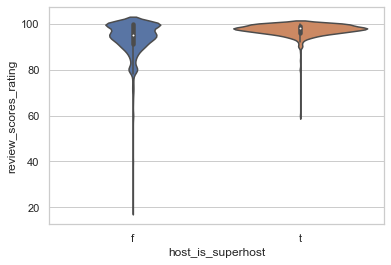

In [14]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.violinplot(x="host_is_superhost", y="review_scores_rating", data=listings)

In [15]:
# Cleaning price data before ploting graph
listings['price'] = listings['price'].str.replace('$','')
listings['price'] = listings['price'].str.replace(',','')
listings['price'] = pd.to_numeric(listings['price'])

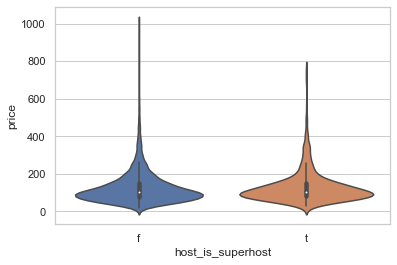

In [16]:
ay = sns.violinplot(x="host_is_superhost", y="price", data=listings)

In [17]:
# function to clean property type data
def mergePropertyTypes(propertytype):
    if(propertytype =="Cabin" or propertytype =="Camper/RV"or propertytype =="Bungalow" or propertytype =="Loft" or propertytype =="Boat" or propertytype =="Bed & Breakfast" or propertytype =="Dorm" or propertytype =="Treehouse" or propertytype =="Treehouse" or propertytype =="Yurt" or propertytype =="Chalet" or propertytype =="Tent" or str(propertytype)=="nan"):
        propertytype ="Other"
    elif(propertytype =="Townhouse" or propertytype =="Condominium"):
        propertytype ="Townhouse & Condom"
    return propertytype

In [18]:
# new column with clened property type
listings["property_type_cleaned"] = listings["property_type"].apply(mergePropertyTypes)
listings["property_type_cleaned"].unique()

array(['Apartment', 'House', 'Other', 'Townhouse & Condom'], dtype=object)

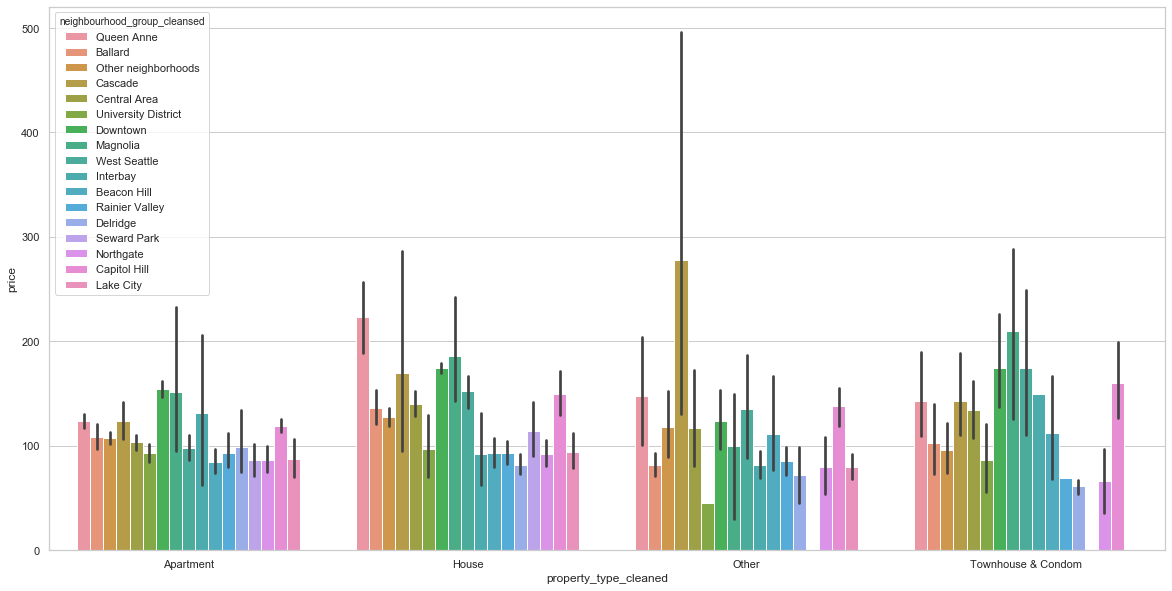

In [19]:
# Average price by Neighbourhood by Property Type
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="property_type_cleaned", y="price", hue="neighbourhood_group_cleansed", data=listings)

In [20]:
listings["review_scores_rating"].head()

0    95.0
1    96.0
2    97.0
3     NaN
4    92.0
Name: review_scores_rating, dtype: float64

In [21]:
listings["review_scores_rating"] = listings["review_scores_rating"]/10
listings["review_scores_rating"].describe()

count    3171.000000
mean        9.453926
std         0.660608
min         2.000000
25%         9.300000
50%         9.600000
75%         9.900000
max        10.000000
Name: review_scores_rating, dtype: float64

In [22]:
import statsmodels.api as sm
group_review = listings[['number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']]
group_review = group_review.dropna()
y = group_review["review_scores_rating"]
x = group_review[['review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']]
est = sm.OLS(y,x).fit()
print(est.summary())

OLS Regression Results                                 
Dep. Variable:     review_scores_rating   R-squared (uncentered):                   0.998
Model:                              OLS   Adj. R-squared (uncentered):              0.998
Method:                   Least Squares   F-statistic:                          3.164e+05
Date:                  Thu, 12 Dec 2019   Prob (F-statistic):                        0.00
Time:                          02:04:57   Log-Likelihood:                         -1473.7
No. Observations:                  3158   AIC:                                      2959.
Df Residuals:                      3152   BIC:                                      2996.
Df Model:                             6                                                  
Covariance Type:              nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

### Simple Data Cleaning & Feature Selection

In [23]:
keep_cols = ['host_response_time','host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type_cleaned', 'room_type', 'accommodates',
'bathrooms', 'bedrooms', 'beds', 'bed_type', 'square_feet', 'price', 'security_deposit', 'cleaning_fee',
'guests_included','extra_people', 'availability_90', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location',
'review_scores_value',  'instant_bookable','cancellation_policy','reviews_per_month']
listing_clean = listings[keep_cols]

In [24]:
# convert numerical columns to float from string
for col in ['host_response_rate', 'host_acceptance_rate','security_deposit', 'cleaning_fee']:
    listing_clean[col] =  listing_clean[col].str.replace('$','').str.replace("%",'').str.replace(',','').astype('float64')
listing_clean[['host_response_rate', 'host_acceptance_rate','security_deposit', 'cleaning_fee']].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,host_response_rate,host_acceptance_rate,security_deposit,cleaning_fee
0,96.0,100.0,NaN,NaN
1,98.0,100.0,100.0,40.0
2,67.0,100.0,1000.0,300.0
3,NaN,NaN,NaN,NaN
4,100.0,NaN,700.0,125.0


In [ ]:
# drop nan values before plotting a heatmap
listing_clean.dropna()

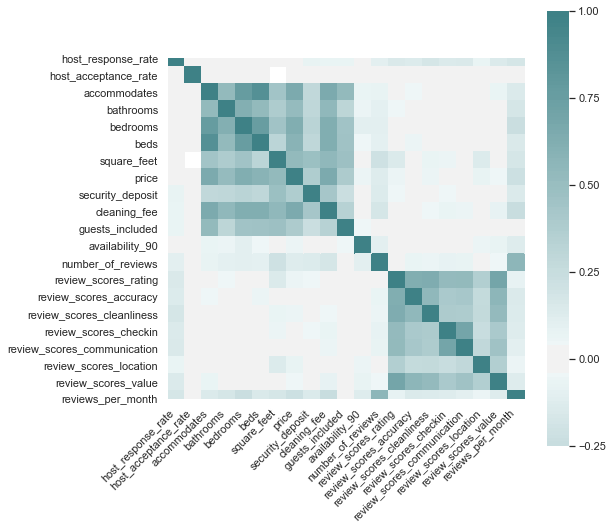

In [58]:
corr = listing_clean.corr()
fig, lheatmap = plt.subplots(figsize=(8,8))  
lheatmap = sns.heatmap(
    corr, 
    vmin=-0.25, vmax=1, center=0,
    cmap=sns.diverging_palette(200, 200, n=200),
    square=True
)
lheatmap.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);